In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [9]:
def white_patch(img, percentile=100):
    img_copy  = img.copy()
    blue = img_copy[:, :, 0]
    green = img_copy[:, :, 1]
    red = img_copy[:, :, 2]

    #Encuentro el maximo de cada canal
    max_blue = np.percentile(blue,percentile)
    max_green = np.percentile(green,percentile)
    max_red = np.percentile(red,percentile)

    print(f"Max Blue: {max_blue}, Max Green: {max_green}, Max Red: {max_red}")

    img_copy[:, :, 2] = img_copy[:, :, 2] / max_red * 255
    img_copy[:, :, 1] = img_copy[:, :, 1] / max_green * 255
    img_copy[:, :, 0] = img_copy[:, :, 0] / max_blue * 255
    img_copy = np.clip(img_copy, 0, 255).astype(np.uint8)
    return img_copy


E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\test_blue.png
Max Blue: 200.0, Max Green: 138.0, Max Red: 165.0


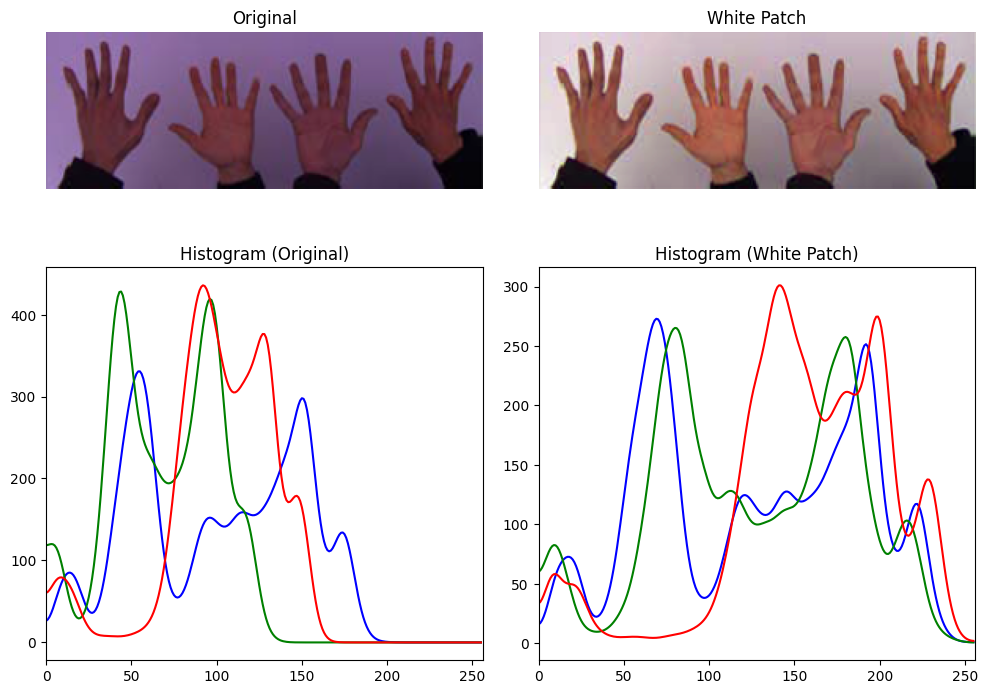

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\test_green.png
Max Blue: 171.0, Max Green: 250.0, Max Red: 210.0


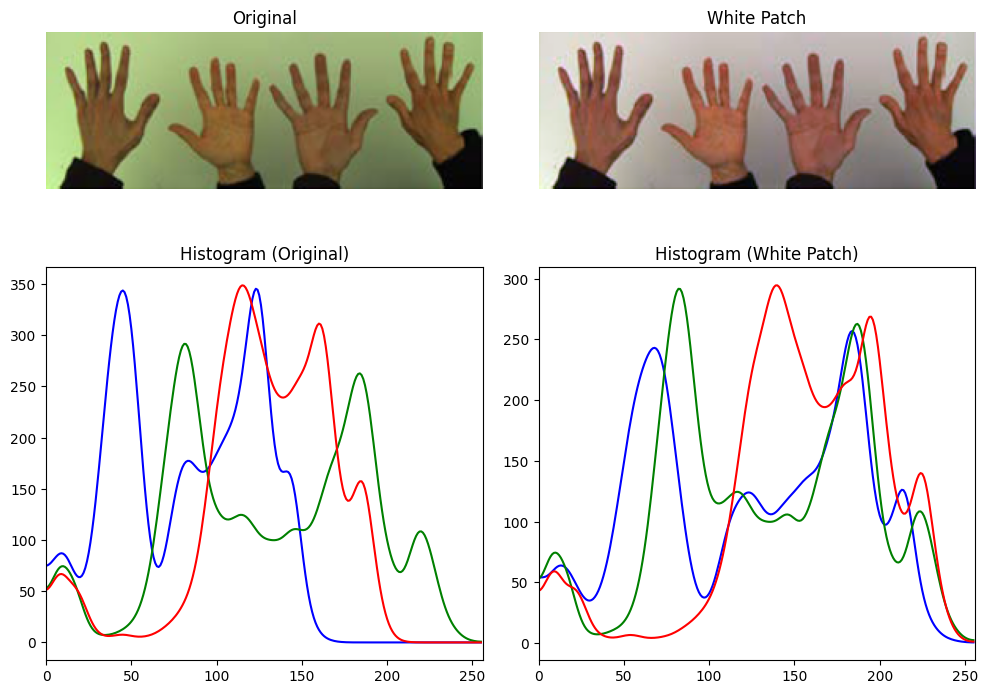

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\test_red.png
Max Blue: 175.0, Max Green: 157.0, Max Red: 247.0


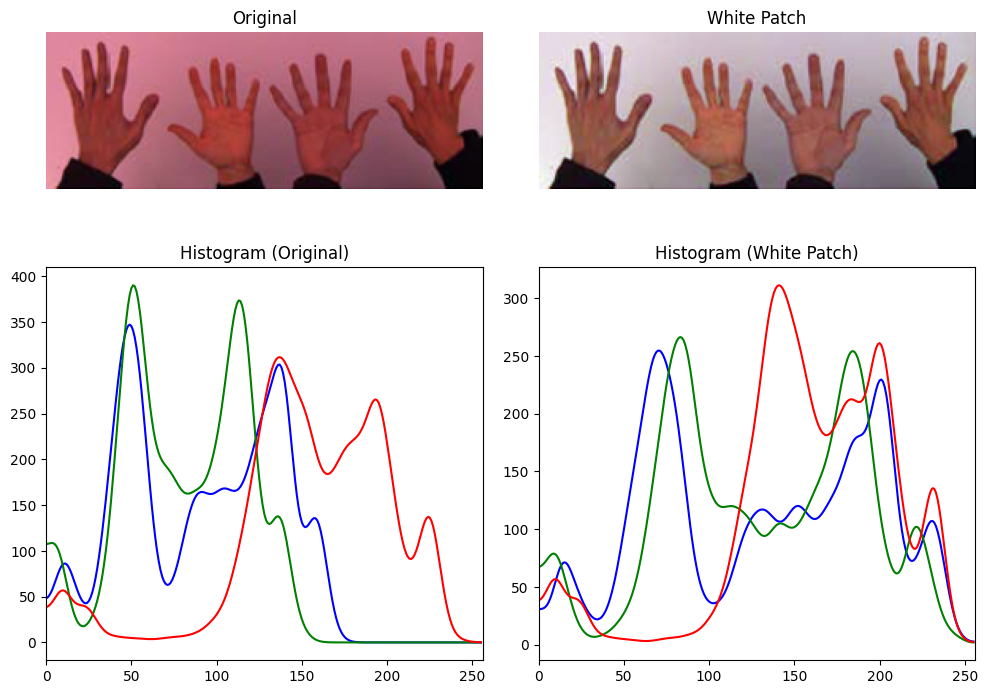

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\wp_blue.jpg
Max Blue: 255.0, Max Green: 255.0, Max Red: 255.0


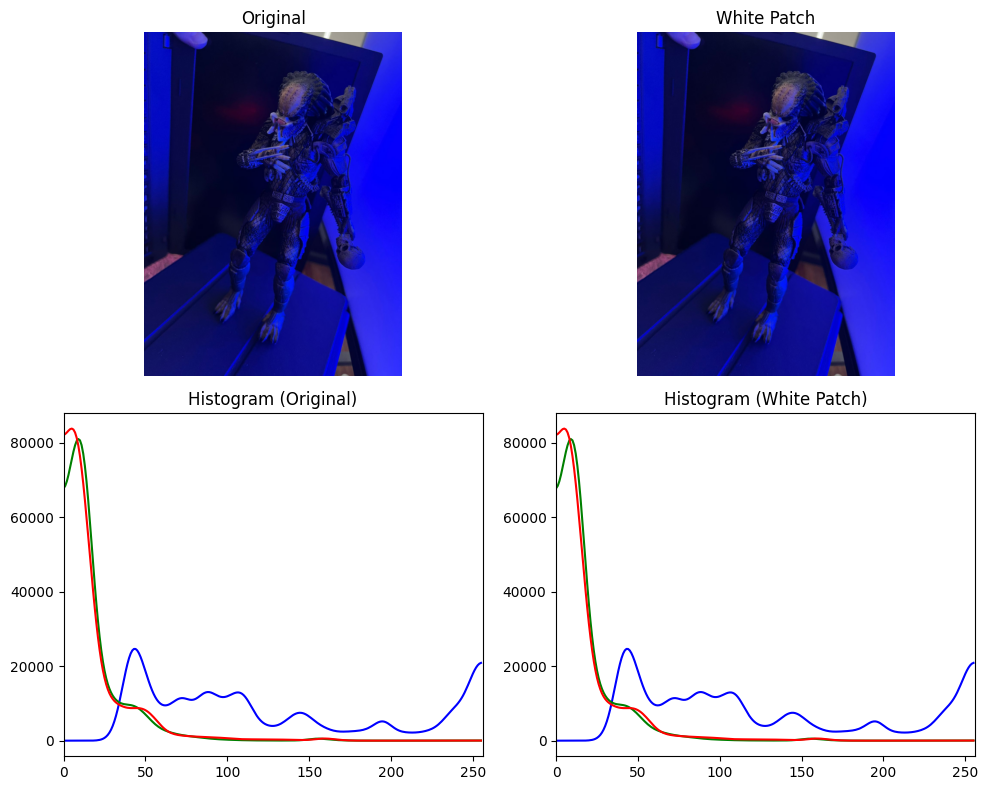

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\wp_green.png
Max Blue: 155.0, Max Green: 252.0, Max Red: 126.0


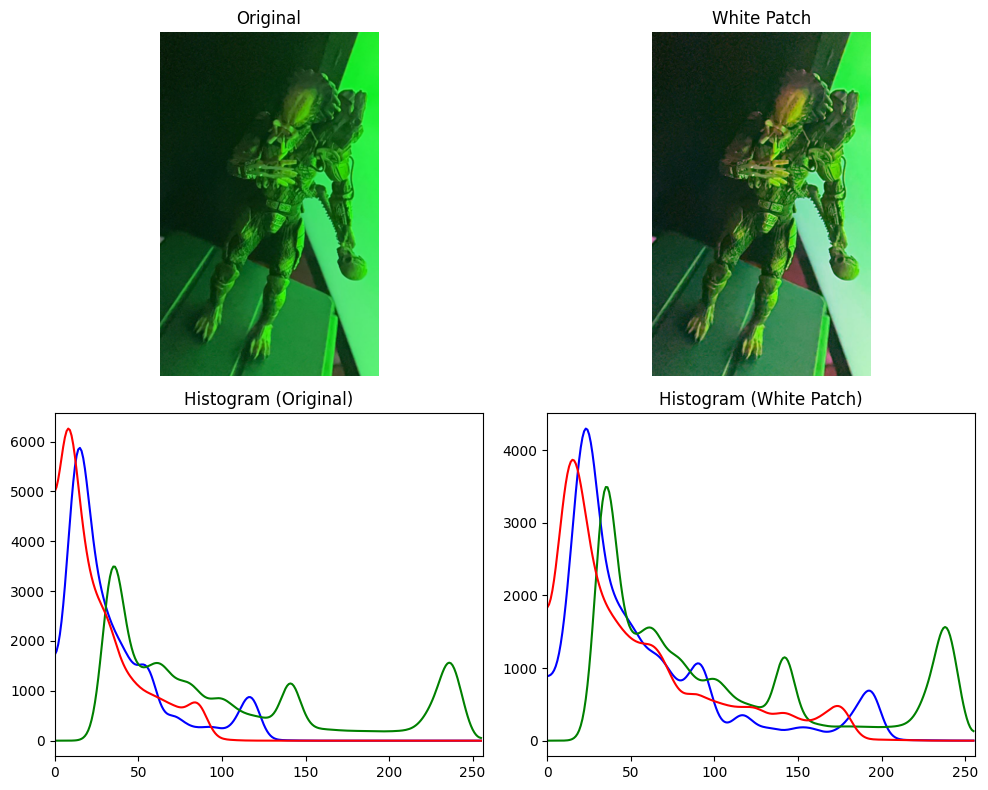

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\wp_green2.jpg
Max Blue: 172.0, Max Green: 255.0, Max Red: 170.0


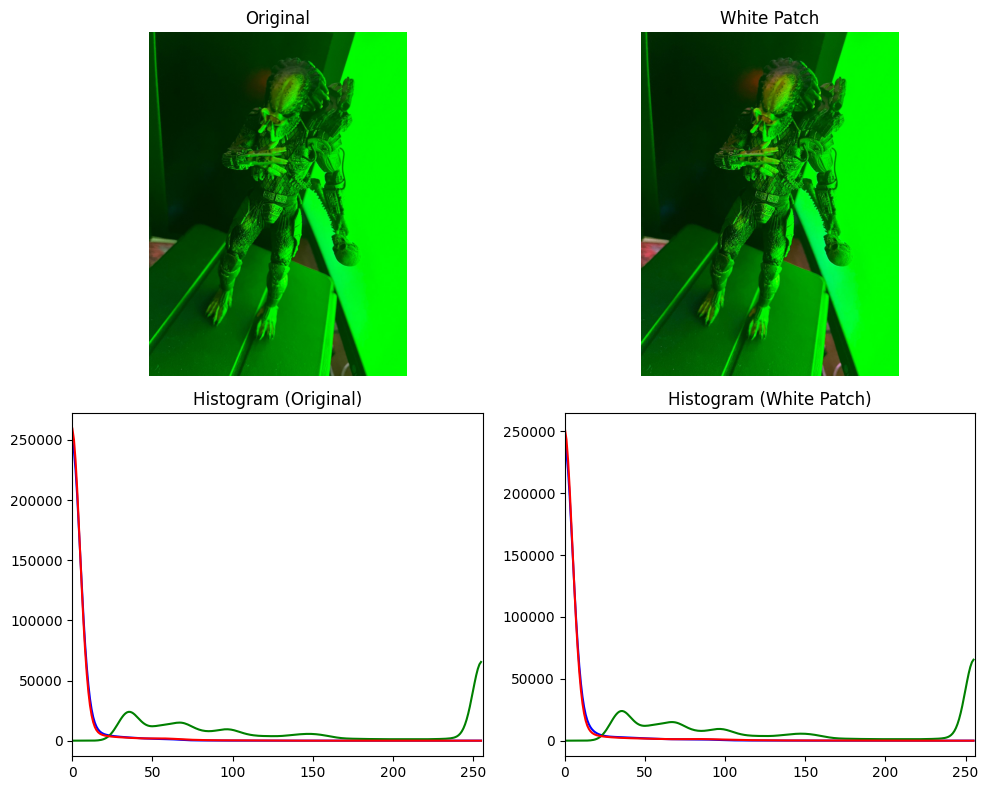

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\wp_red.png
Max Blue: 122.0, Max Green: 134.0, Max Red: 255.0


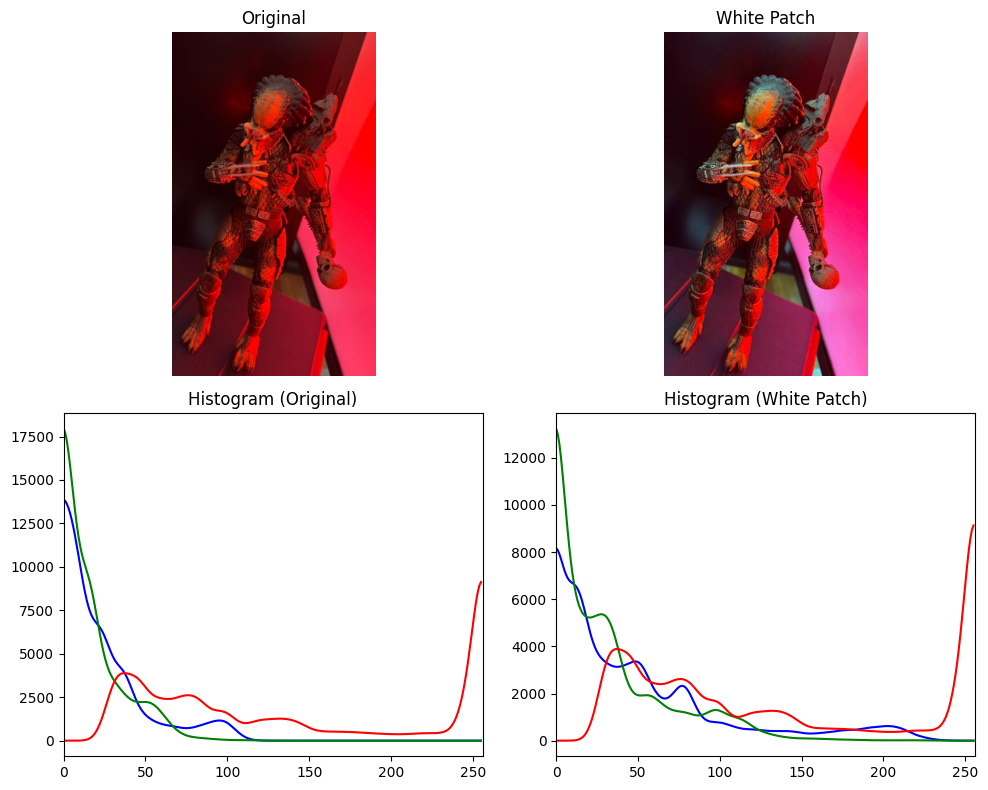

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch\wp_red2.jpg
Max Blue: 203.0, Max Green: 201.0, Max Red: 255.0


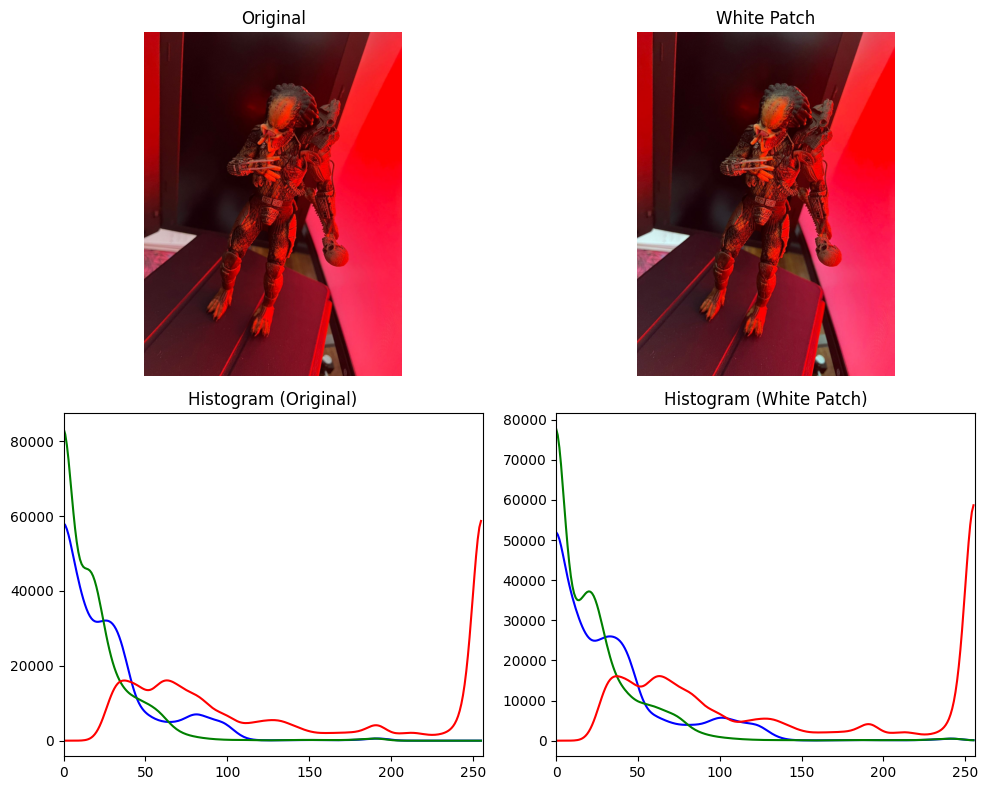

In [10]:
from scipy.ndimage import gaussian_filter1d

folder_path = r'E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\white_patch'

image_paths = glob.glob(os.path.join(folder_path, '*.*'))

for image_path in image_paths:
    print(image_path)
    img = cv.imread(image_path)
    img_filtered = white_patch(img)

    # Create a figure with 2 rows: one for images and one for histograms
    plt.figure(figsize=(10, 8))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    # White Patch filtered image
    plt.subplot(2, 2, 2)
    plt.imshow(cv.cvtColor(img_filtered, cv.COLOR_BGR2RGB))
    plt.title('White Patch')
    plt.axis('off')

    # Histogram for the original image
    plt.subplot(2, 2, 3)
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256]).flatten()
        smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
        plt.plot(smoothed_hist, color=color)
    plt.title('Histogram (Original)')
    plt.xlim([0, 256])

    # Histogram for the White Patch filtered image
    plt.subplot(2, 2, 4)
    for i, color in enumerate(colors):
        hist = cv.calcHist([img_filtered], [i], None, [256], [0, 256]).flatten()
        smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
        plt.plot(smoothed_hist, color=color)
    plt.title('Histogram (White Patch)')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


Podemos observar en los gráficos una diferencia crucial entre las imágenes con mas recuperación de color y las que prácticamente no recuperan nada. El histograma de los valores de intensidad de cada imagen nos muestra como aquellos que presentan menos oscilaciones y de menor intensidad se ven menos afectadas por la normalización. Es por esto que esas imágenes no recuperan su color.
Las imágenes wp_red2, wp_green2 y wp_blue son las mayores pruebas de esto.
Además, en la imagen wp_blue, su valor máximo en cada canal de color es 255. Siendo que la ecuación de normalización para cada pixel se da por V / M * 255.
Siendo V el valor de intensidad del pixel a normalizar y M el valor máximo de intensidad de todos los pixeles. Siempre que se de un valor M de 255 resultara en que la ecuación de V, es decir, no haga ningún cambio.

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\ej2\img1_tp.png


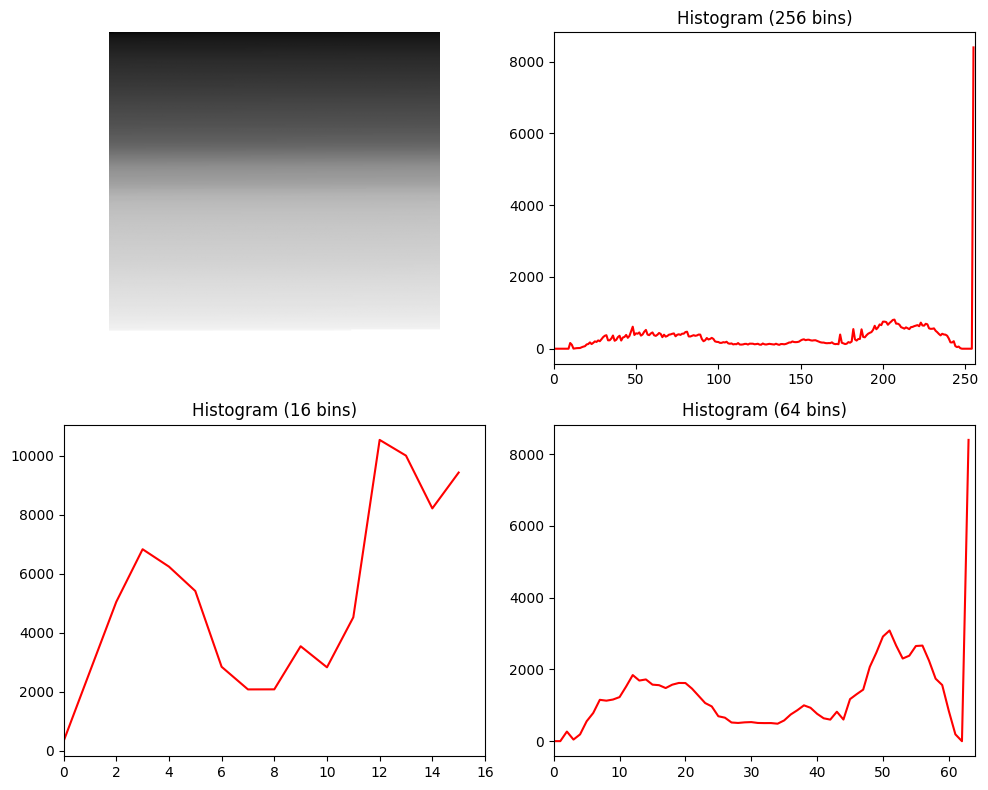

E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\ej2\img2_tp.png


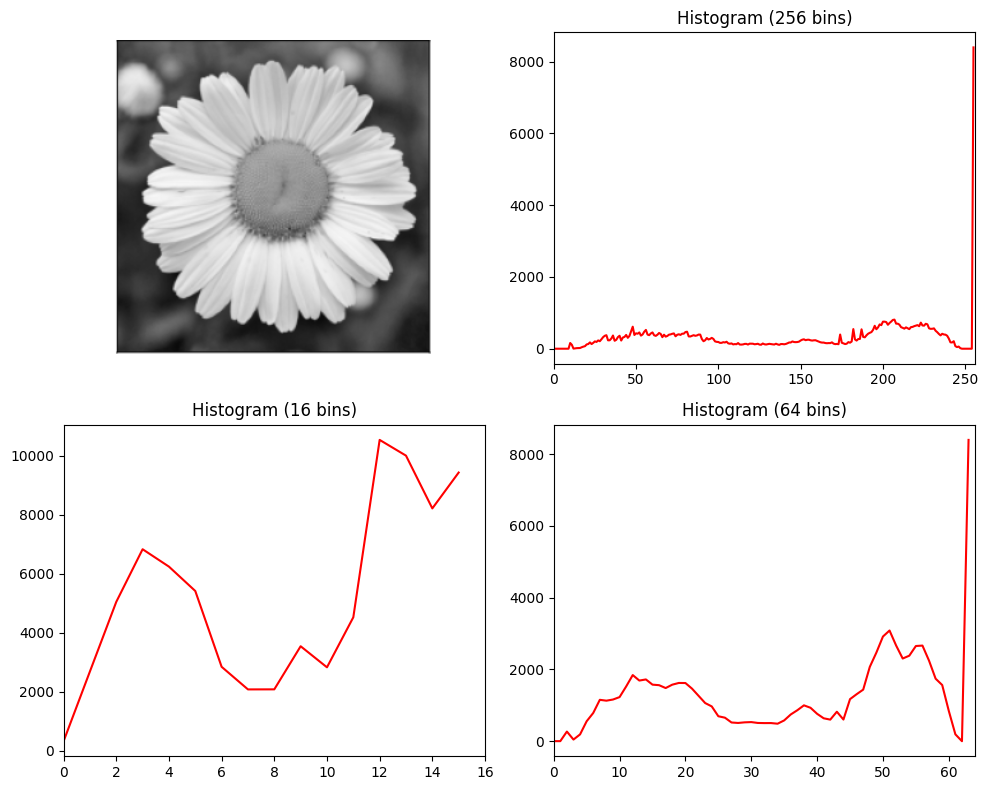

In [11]:
folder_path = r'E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\ej2'

image_paths = glob.glob(os.path.join(folder_path, '*.*'))

for image_path in image_paths:
    print(image_path)
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Create a figure with 2 rows: one for images and one for histograms
    plt.figure(figsize=(10, 8))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)

    hist = cv.calcHist([img], [0], None, [256], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(hist, color=color)
    plt.title('Histogram (256 bins)')
    plt.xlim([0, 256])

    plt.subplot(2, 2, 3)

    hist = cv.calcHist([img], [0], None, [16], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(hist, color=color)
    plt.title('Histogram (16 bins)')
    plt.xlim([0, 16])

    plt.subplot(2, 2, 4)

    hist = cv.calcHist([img], [0], None, [64], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(hist, color=color)
    plt.title('Histogram (64 bins)')
    plt.xlim([0, 64])

    plt.tight_layout()
    plt.show()

Sin importar cual sea la selección de bins, ambas imágenes tienen el mismo histograma de intensidad. Esto revela que ese posible que dos imágenes muy diferentes que nos proveen información muy distinta tengan superposición total o casi total de alguna de sus características. Con estas consideraciones hay que tener cuidado al usar un histograma como feature de entrenamiento ya que puede ser una medida engañosa, particularmente para imágenes en blanco y negro.

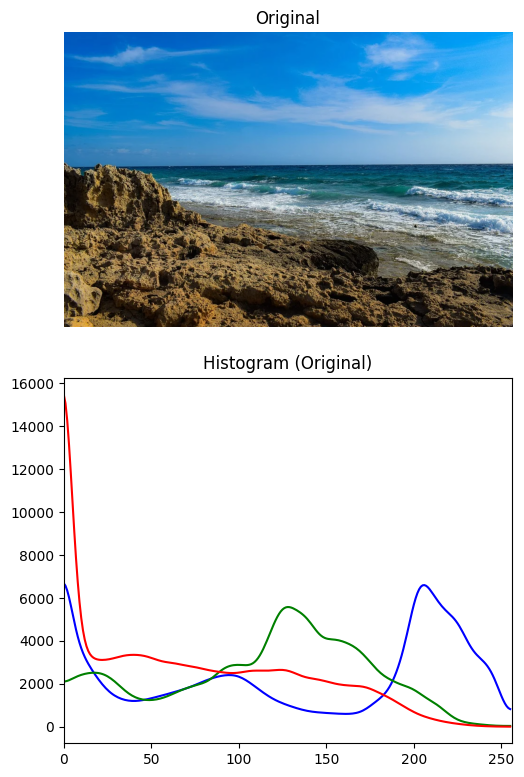

In [12]:
folder_path = r'E:\importante\Master\MLOps\TP\TP2\Computer-Vision-1\TP1\segmentacion.png'
img = cv.imread(folder_path)

# Create a figure with 2 rows: one for images and one for histograms
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Histogram for the original image
plt.subplot(2, 2, 3)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(smoothed_hist, color=color)
plt.title('Histogram (Original)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

In [13]:
# Tomamos una muestra del suelo
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
alto, ancho, canales = img_color.shape
print(f"🔹 Ancho: {ancho} píxeles")
print(f"🔹 Alto: {alto} píxeles")

🔹 Ancho: 953 píxeles
🔹 Alto: 628 píxeles


(np.float64(-0.5), np.float64(109.5), np.float64(109.5), np.float64(-0.5))

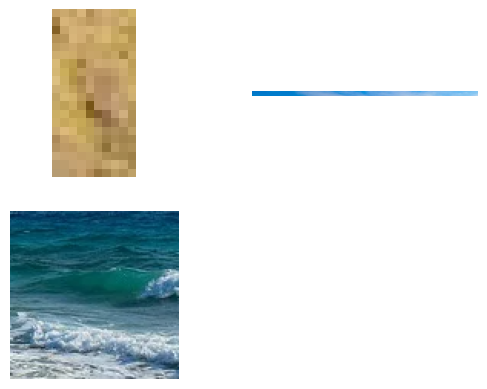

In [14]:
img_muestra1 = img_color[540:560, 40:50,:]
plt.subplot(2, 2, 1)
plt.imshow(img_muestra1)
plt.axis('off')

img_muestra2 = img_color[140:160, 40:970,:]
plt.subplot(2, 2, 2)
plt.imshow(img_muestra2)
plt.axis('off')

img_muestra3 = img_color[290:400, 640:750,:]
plt.subplot(2, 2, 3)
plt.imshow(img_muestra3)
plt.axis('off')

[189.535, 156.52, 97.16]
[17.897451634241108, 18.144685172248064, 16.857769722000597]


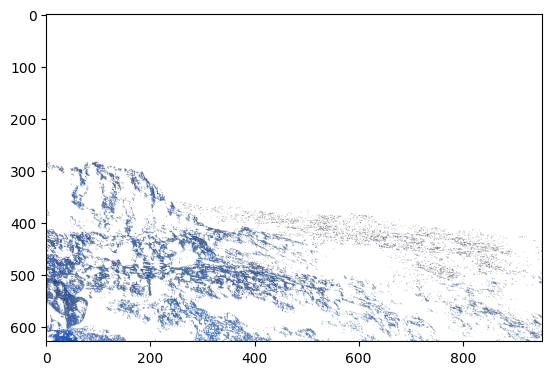

<function matplotlib.pyplot.show(close=None, block=None)>

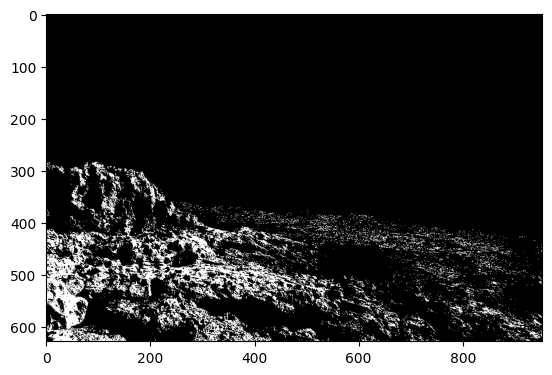

In [15]:
color_mean, color_std = cv.meanStdDev(img_muestra1)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 3
mask = cv.inRange(img_color, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

result_white = cv.bitwise_not(img_segmentada)


plt.figure(3)
plt.imshow(result_white)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

[86.92721796276014, 161.9384446878423, 220.69386637458928]
[52.11716215466312, 25.314415856482558, 13.172336326800439]


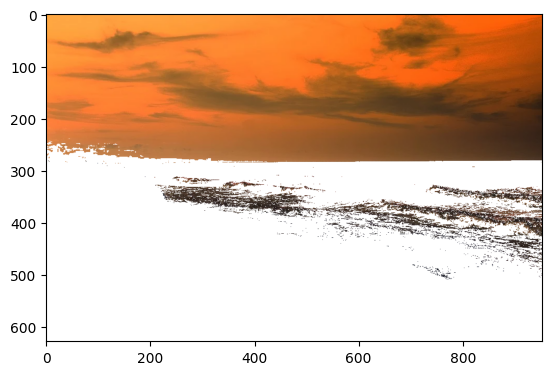

<function matplotlib.pyplot.show(close=None, block=None)>

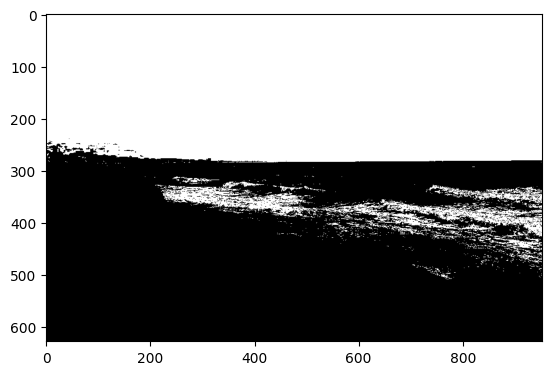

In [16]:
color_mean, color_std = cv.meanStdDev(img_muestra2)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 3
mask = cv.inRange(img_color, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

result_white = cv.bitwise_not(img_segmentada)


plt.figure(3)
plt.imshow(result_white)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

[68.89975206611571, 116.96231404958678, 132.2618181818182]
[67.3589161634552, 47.40618470583962, 45.11892143075206]


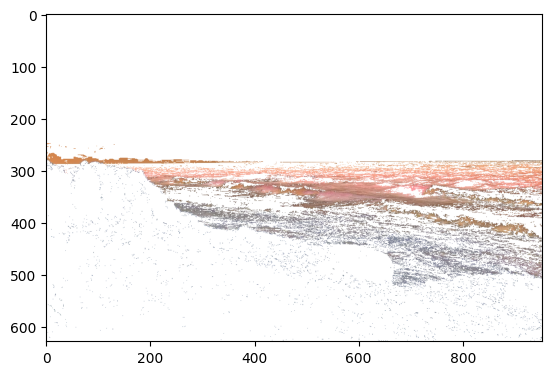

<function matplotlib.pyplot.show(close=None, block=None)>

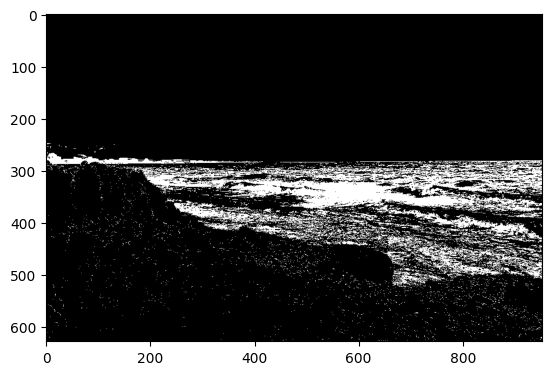

In [17]:
color_mean, color_std = cv.meanStdDev(img_muestra3)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 1
mask = cv.inRange(img_color, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

result_white = cv.bitwise_not(img_segmentada)


plt.figure(3)
plt.imshow(result_white)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

Una selección de imagenes de muestra intentando abarcar todos los colores del objeto a segmentar probo mejorar sustancialmente la segmentación (horizontal para el cielo, vertical para el mar) Aun así hay superposición en los colores repetidos entre los objetos, y al intentar abarcar el color negro en la tierra empeora enormemente la segmentación. A continuación se hicieron pruebas para ver si se podia tener mejores resultados para el mar si se eliminaba una de los canales de color que le dieran mas superposicion con los otros objetos, no hubo exito en esta técnica.

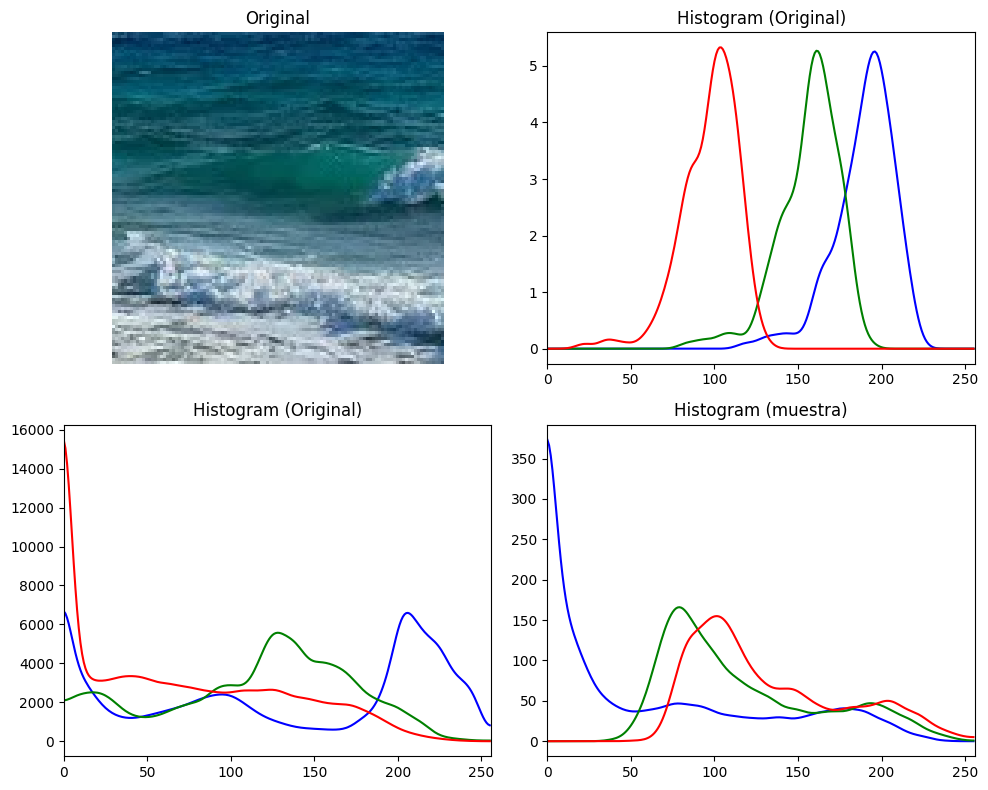

[68.89975206611571, 116.96231404958678, 132.2618181818182]
[67.3589161634552, 47.40618470583962, 45.11892143075206]


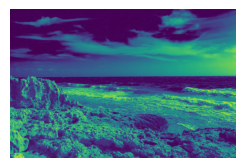

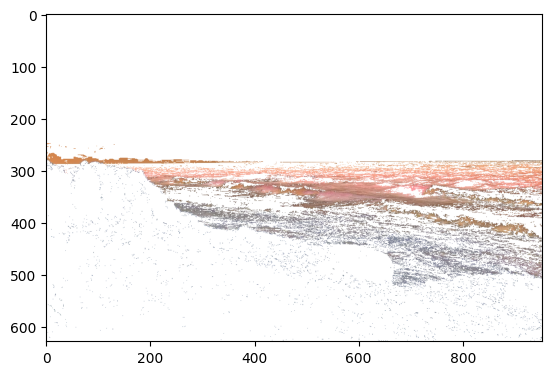

<function matplotlib.pyplot.show(close=None, block=None)>

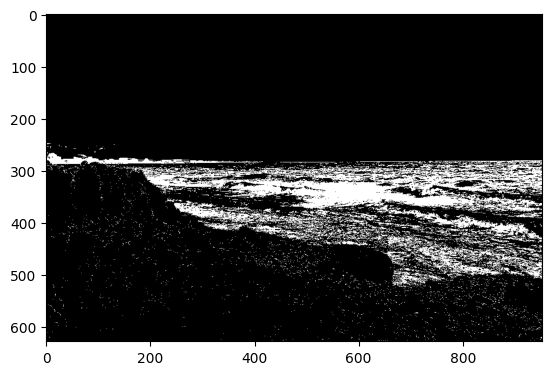

In [18]:
img_copy = img_color[290:400, 640:750,:]
img_copy[:, :, 2] = img_copy[:, :, 2] #red
img_copy[:, :, 1] = img_copy[:, :, 1] #green
img_copy[:, :, 0] = img_copy[:, :, 0] #blue
img_copy = np.clip(img_copy, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img_copy)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv.calcHist([img_muestra1], [i], None, [256], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(smoothed_hist, color=color)
plt.title('Histogram (Original)')
plt.xlim([0, 256])

# Histogram for the original image
plt.subplot(2, 2, 3)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(smoothed_hist, color=color)
plt.title('Histogram (Original)')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv.calcHist([img_copy], [i], None, [256], [0, 256]).flatten()
    smoothed_hist = gaussian_filter1d(hist, sigma=5)  # Apply Gaussian smoothing
    plt.plot(smoothed_hist, color=color)
plt.title('Histogram (muestra)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

img_modif = img[:, :, 2]

img_muestra4 = img_color[290:400, 640:750,:]
plt.subplot(2, 2, 3)
plt.imshow(img_modif)
plt.axis('off')



color_mean, color_std = cv.meanStdDev(img_muestra4)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 1
mask = cv.inRange(img_color, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

result_white = cv.bitwise_not(img_segmentada)


plt.figure(3)
plt.imshow(result_white)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show